# <center>Introduction to Data Science</center> 
### <center>Neural Network Dataset 1</center>
### <center>Patient Treatment Classification</center>
### **<div align="right">By: Pujesh Pradhan </div>**

### Table of Content
* [Objective and Data Description](#Objective-and-Data-Description)
* [Statistical Numerical and Graphical Summaries](#Statistical-Numerical-and-Graphical-Summaries)
* [Algorithm Implementation and Statistical Tests](#Algorithm-Implementation-and-Statistical-Tests)
* [Performance Improvement](#Performance-Improvement)
* [Conclusion](#Conclusion)

### Objective and Data Description

#### Overview
Based on either the treatment/procedures, lab results or the condition of a patient, medical facility decides whether the patient needs to be assigned either as Inpatient or Outpatient. Inpatient care requires patient to stay at the medical facility for atleast a night while patient receiving outpatient cares needs not to spend a night. 
The dataset contains records of various laboratory test results, age and gender of several patients and determines if the patient needs to be admitted to the medical facility or not. 

#### Objective
**With the help of this dataset we would like to predict whether the patient requires a Inpatient care or Outpatient care.**

#### About the Dataset
This dataset is being used from the Kaggle website and the URL to the dataset is: [Patient Treatment](https://www.kaggle.com/manishkc06/patient-treatment-classification)

It has 11 fields and the description of each field of the dataset are: 
1. **HAEMATOCRIT** - Laboratory test result of haematocrit (measures the ratio of the volume of red blood cells to the total volume of blood)
2. **HAEMOGLOBINS** - Laboratory test result of haemoglobins (measures the iron-containing protein in blood that is essential for oxygen transport)
3. **ERYTHROCYTE** - Laboratory test result of erythrocyte (measures the degree of inflammation present in the body)
4. **LEUCOCYTE** - Laboratory test result of leucocyte (measures the level of leukocytes, or white blood cells)
5. **THROMBOCYTE** - Laboratory test result of thrombocyte (measures the number of platelets in your blood)
6. **MCH** - Laboratory test result of MCH (measures the average amount in each of the red blood cells of a protein which carries oxygen around your body)
7. **MCHC** - Laboratory test result of MCHC (measures the average amount of hemoglobin in a group of red blood cells)
8. **MCV** - Laboratory test result of MCV (measures the average size of your red blood cells)
9. **AGE** - Age of the patient 
10. **SEX** - Gender of the patient 
11. **SOURCE** - Inpatient care or Outpatient care (1=Inpatient, 0=Outpatient)

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Describing the size, shape and dimension of the dataset.
patient_data = pd.read_csv('patient_treatment.csv') 
print("The total size of the dataset is {} bytes.".format(patient_data.size))
print("There are {} number of records and {} number of fields with a {} shape.".format(patient_data.shape[0], patient_data.shape[1], patient_data.shape))
print("The dataset has a {} dimensional structure.".format(patient_data.ndim))

The total size of the dataset is 36399 bytes.
There are 3309 number of records and 11 number of fields with a (3309, 11) shape.
The dataset has a 2 dimensional structure.


In [3]:
print("The top 5 records of the dataset are: \n{}".format(patient_data.head()))

The top 5 records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE  
0  80.9   33   F       1  
1  65.0   36   M       0  
2  93.9   70   F       0  
3  89.7   18   F       0  
4  83.7   36   M       0  


In [4]:
#Replacing the values F as 1 and M as 1 in the sex field of the dataset. 
#The conversion is required to be able to scale the data within a given range.

patient_data['SEX'] = patient_data['SEX'].replace(['F', 'M'], [1, 0])
print("The top 5 updated records of the dataset are: \n{}".format(patient_data.head()))

The top 5 updated records of the dataset are: 
   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE  SEX  SOURCE  
0  80.9   33    1       1  
1  65.0   36    0       0  
2  93.9   70    1       0  
3  89.7   18    1       0  
4  83.7   36    0       0  


In [5]:
#Printing the data types
print("The datatype of the dataset are: \n{}".format(patient_data.dtypes))

The datatype of the dataset are: 
HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX               int64
SOURCE            int64
dtype: object


In [6]:
#Statistical description of the data
print(patient_data.describe().T)

               count        mean         std    min     25%     50%     75%  \
HAEMATOCRIT   3309.0   38.226111    5.971943  13.70   34.30   38.70   42.50   
HAEMOGLOBINS  3309.0   12.749350    2.084325   3.80   11.40   12.90   14.20   
ERYTHROCYTE   3309.0    4.544802    0.784510   1.48    4.04    4.58    5.06   
LEUCOCYTE     3309.0    8.715533    4.991299   1.10    5.70    7.60   10.30   
THROMBOCYTE   3309.0  258.893019  112.676139  10.00  191.00  257.00  322.00   
MCH           3309.0   28.230039    2.696520  14.90   27.20   28.70   29.80   
MCHC          3309.0   33.336476    1.247055  26.00   32.70   33.40   34.10   
MCV           3309.0   84.611333    6.916079  54.00   81.50   85.30   88.80   
AGE           3309.0   46.644303   21.874106   1.00   29.00   48.00   64.00   
SEX           3309.0    0.473255    0.499360   0.00    0.00    0.00    1.00   
SOURCE        3309.0    0.398005    0.489561   0.00    0.00    0.00    1.00   

                  max  
HAEMATOCRIT     69.00  
HAE

### Statistical Numerical and Graphical Summaries

We can further modify the graph using the pairplot to determine what data fall under Inpatient or Outpatient


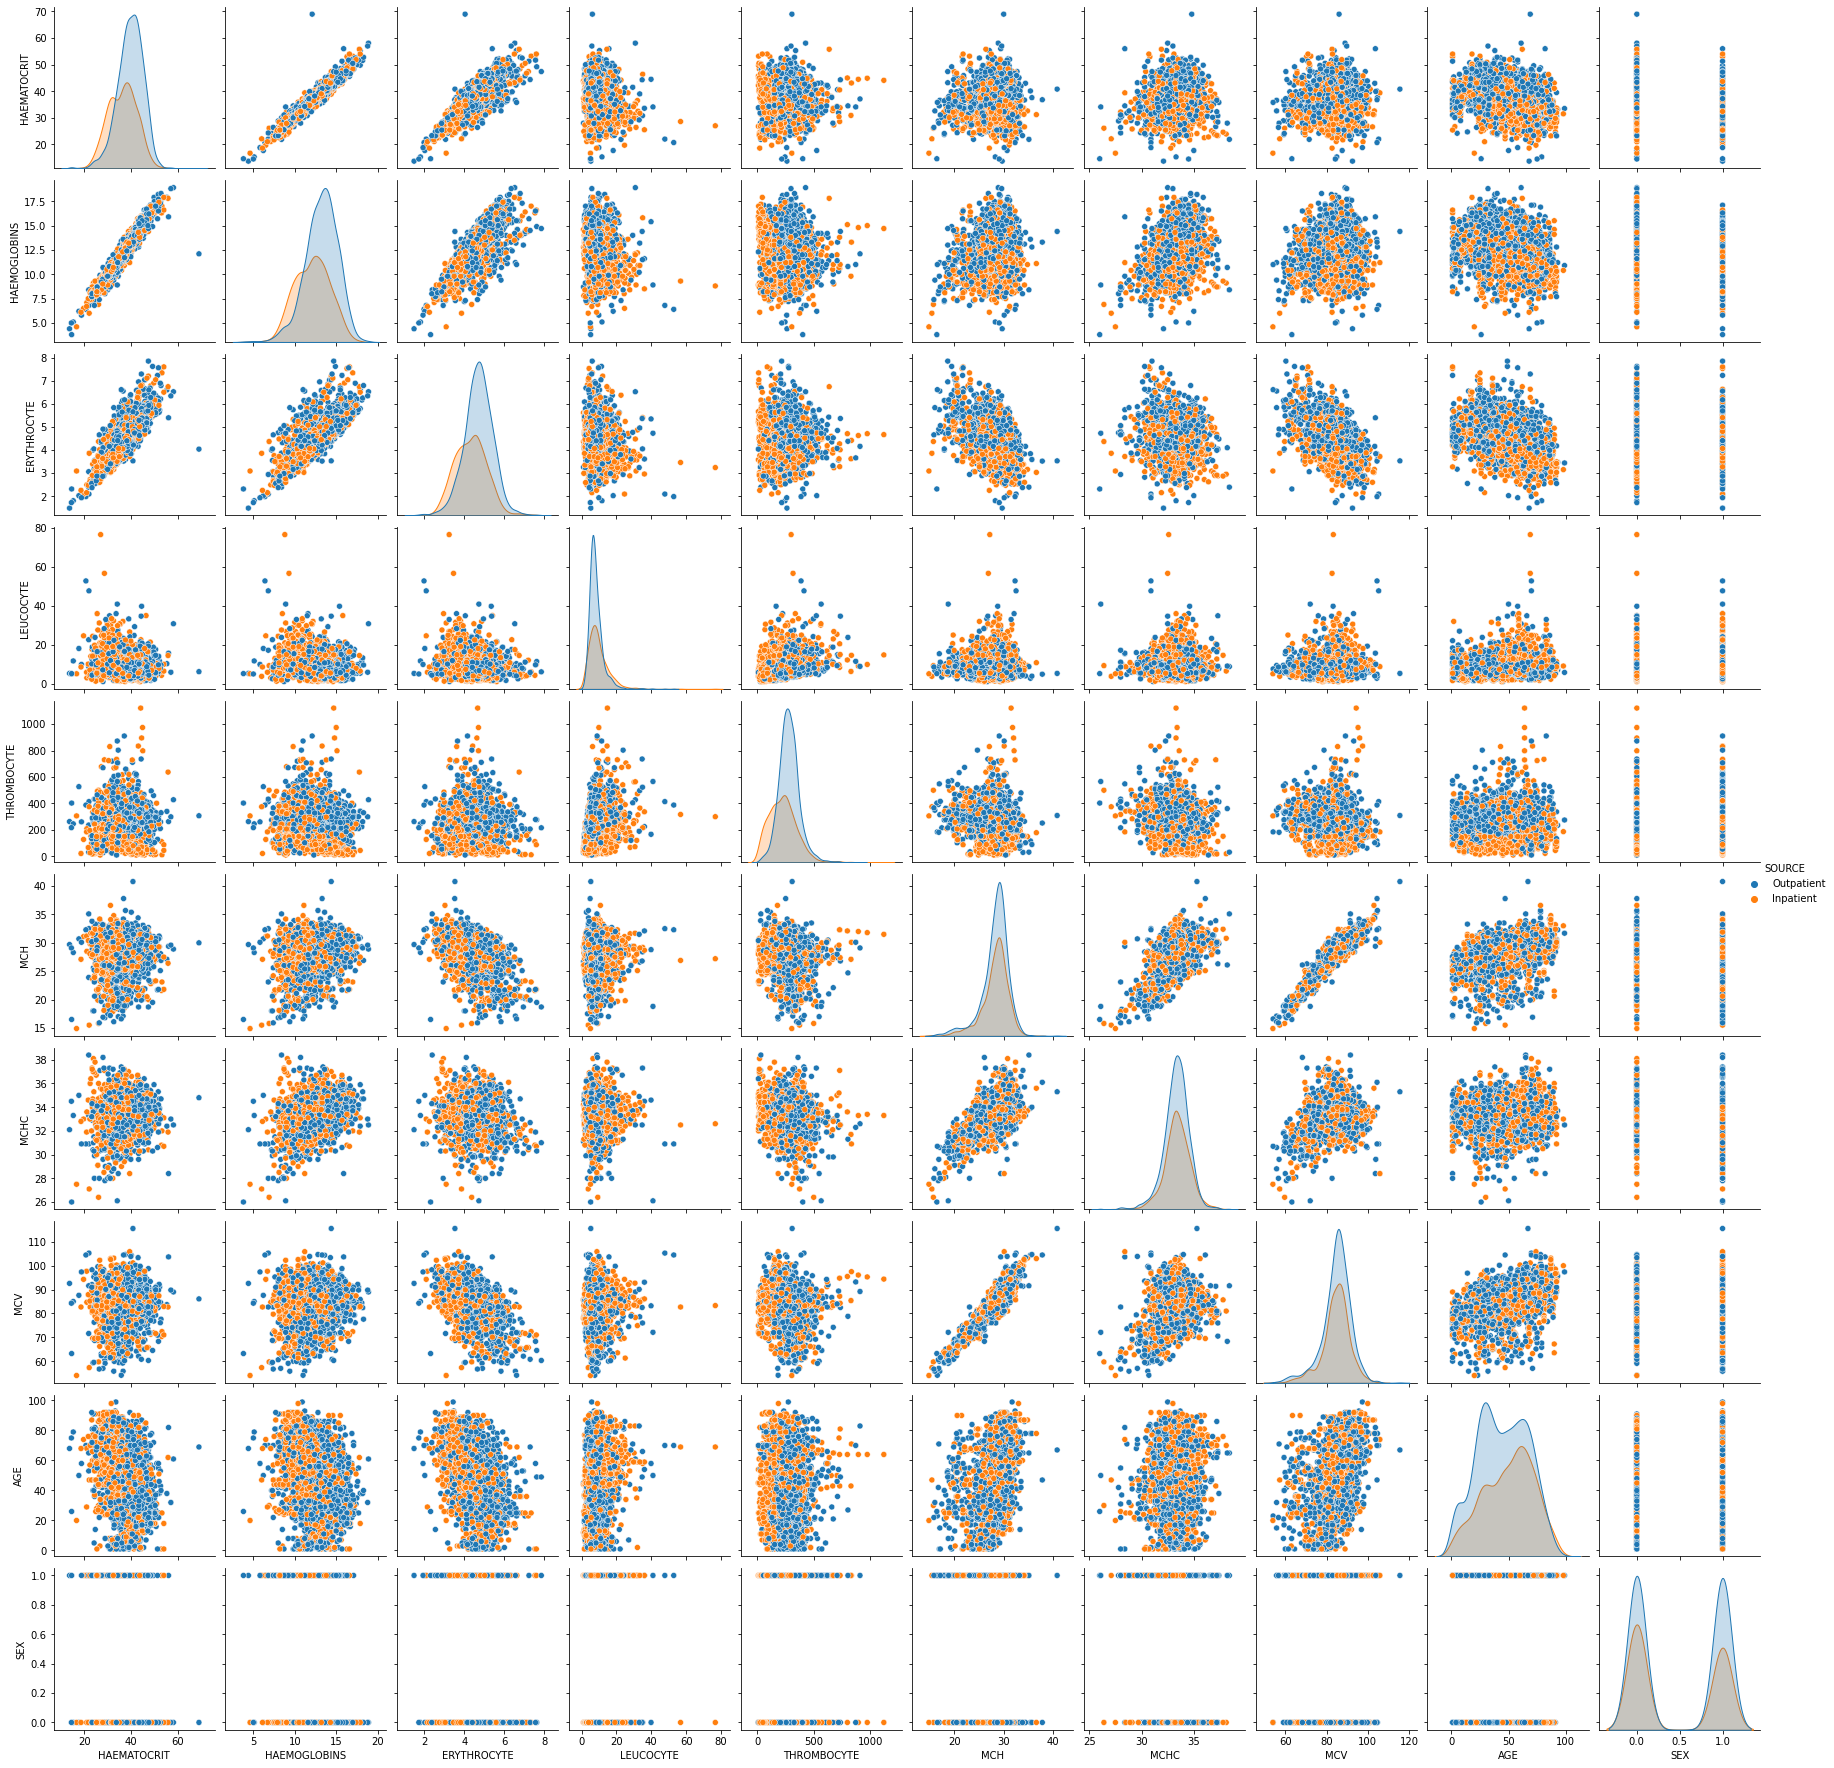

In [7]:
#plotting pairplot to see how the data are scattered based on the target variable
print("We can further modify the graph using the pairplot to determine what data fall under Inpatient or Outpatient")

_sns_pairplot_data = sns.pairplot(patient_data, hue='SOURCE')

#Updating the legend label for ease. 
new_labels = ['Outpatient', 'Inpatient']
for t, l in zip(_sns_pairplot_data._legend.texts, new_labels): 
    t.set_text(l)

In the graph above, the blue dots/area denotes the Outpatient care where as orange represents the Inpatient care. 
We can see there are few outliers in the graph. <br/>
Looking at the graph, on the age and gender column, we can see that the blue and orange dots are dispersed evenly, which might indicate that these fields does not factor in determining the type of care a patient requires. 
However, fields such as Haematocrit, Haemoglobins, Erythrocyte, Leucocyte and Thrombocyte looks to have high impact on determining the type. When the value for these are low, the patient are tend to be admitted to the medical facility.

### Algorithm Implementation and Statistical Tests 

Implementing the Decision Tree algorithm to predict the classification of the Inpatient/Outpatient patient. <br/>

In [35]:
#Considering all of the features initially to see how well the neural network predict. 
X = patient_data.iloc[:, 0:10]
y = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Testing with different hyperparameters.

In [36]:
#Creating 3 hidden layer with 10 units on each as we have 10 features. 
#Using "lbfgs" feature. The max_iter is increased to 4000 
#since the iteration with lower value gave us an error that it failed to converge.
#The warning indicated that the maximum iteration was reached without the model able to 
#converge to the optimal result. 
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), 
                           max_iter=4000, solver="lbfgs", early_stopping=True)
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 0 number of training samples during the fitting phase and ran for 1243 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.7234299516908212
Confusion Matrix:
      F    T
F  412   76
T  153  187
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       488
           1       0.71      0.55      0.62       340

    accuracy                           0.72       828
   macro avg       0.72      0.70      0.70       828
weighted avg       0.72      0.72      0.72       828



In [23]:
#Creating 3 hidden layer with 10 units on each as we have 10 features. Using "sgd" as a solver
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), 
                           max_iter=1000, solver="sgd")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 188556 number of training samples during the fitting phase and ran for 76 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.6099033816425121
Confusion Matrix:
      F  T
F  505  0
T  323  0
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       505
           1       0.00      0.00      0.00       323

    accuracy                           0.61       828
   macro avg       0.30      0.50      0.38       828
weighted avg       0.37      0.61      0.46       828



In [24]:
#Creating 3 hidden layer with 10 units on each as we have 10 features. 
#Using "sgd" as a solver and invscaling as the learning rate for the algorithm. 
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), 
                           max_iter=500, solver="sgd", learning_rate="invscaling")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 39696 number of training samples during the fitting phase and ran for 16 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.6099033816425121
Confusion Matrix:
      F  T
F  505  0
T  323  0
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       505
           1       0.00      0.00      0.00       323

    accuracy                           0.61       828
   macro avg       0.30      0.50      0.38       828
weighted avg       0.37      0.61      0.46       828



In [25]:
#Creating 3 hidden layer with 10 units on each as we have 10 features. 
#Using "sgd" as a solver and invscaling as the learning rate for the algorithm. 
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), 
                           max_iter=1000, solver="sgd", learning_rate="adaptive")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 213366 number of training samples during the fitting phase and ran for 86 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.6099033816425121
Confusion Matrix:
      F  T
F  505  0
T  323  0
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       505
           1       0.00      0.00      0.00       323

    accuracy                           0.61       828
   macro avg       0.30      0.50      0.38       828
weighted avg       0.37      0.61      0.46       828



In [26]:
#Creating 3 hidden layer with 10 units on each as we have 10 features. 
#Using "adam" as a solver.
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), 
                           max_iter=8000, early_stopping=True)
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 26784 number of training samples during the fitting phase and ran for 12 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.6099033816425121
Confusion Matrix:
      F  T
F  505  0
T  323  0
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       505
           1       0.00      0.00      0.00       323

    accuracy                           0.61       828
   macro avg       0.30      0.50      0.38       828
weighted avg       0.37      0.61      0.46       828



From all the different hyperparameters, we can see that MLPClassifier with hidden layer with size of (10,10,10) and max iteration of 4000 using lbfgs as a solver has a higher accuracy than the rest. 

As of now, we have used all of the features available to us. Using of few selected best feature might give us better result. Thus using the SelectKBest and chi2 to find the top features that contribute in predicting the output. 

### Performance Improvement

In [37]:
#Considering all of the features to find the top features that helps to determine the Potability of the water.
X = patient_data.iloc[:, 0:10]
y = patient_data.iloc[:, -1]

select_k_best = SelectKBest(score_func=chi2, k=5)

best_result = select_k_best.fit(X, y)

scores = pd.DataFrame(best_result.scores_)
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Field', 'Score']

print(feature_scores.nlargest(10, 'Score'))

          Field        Score
4   THROMBOCYTE  8547.951143
8           AGE   437.092039
0   HAEMATOCRIT   228.922785
3     LEUCOCYTE   184.512253
1  HAEMOGLOBINS    73.270731
2   ERYTHROCYTE    25.384510
9           SEX     5.707528
7           MCV     0.345889
6          MCHC     0.104526
5           MCH     0.004000


From the above list we can see that THROMBOCYTE, AGE, HAEMATOCRIT and LEUCOCYTE looks to be the major features to predict whether a patient needs inpatient or outpatient care. All of their scores are above 100, thus we will use these four fields in our prediction. 

In [38]:
#Choosing only the top four features.
X = patient_data[['THROMBOCYTE', 'AGE', 'HAEMATOCRIT', 'LEUCOCYTE']]
Y = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X, Y)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Using the hyperparameter that provides the better prediction from the above settings.
classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=4000, solver="lbfgs")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

#Creating confusion matrix and classification report on the prediction.
y_pred = classifier.predict(X_test)
matrix_data = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['F', 'T'], columns=['F', 'T'])
print("Confusion Matrix:\n",matrix_data)

print(classification_report(y_test,np.ravel(y_pred)))

The solver saw 0 number of training samples during the fitting phase and ran for 4000 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.7463768115942029
Confusion Matrix:
      F    T
F  435   73
T  137  183
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       508
           1       0.71      0.57      0.64       320

    accuracy                           0.75       828
   macro avg       0.74      0.71      0.72       828
weighted avg       0.74      0.75      0.74       828



We can find out the best values of hyperparameters that can be used for the current dataset using the GridSearchCV. We are defining the different hyperparameters and passing to the GridSearchCV to find the optimal hyperparameters.

In [29]:
solver = ["sgd", "adam", "lbfgs"]
activation = ["identity", "logistic", "tanh", "relu"]
max_iter = [100, 500, 800, 1000, 2000]
hidden_layer_sizes=[(4,4), (2,2,2), (4,4,4), (10,10,10)]
param_grid = dict(solver=solver, activation=activation, max_iter=max_iter, hidden_layer_sizes=hidden_layer_sizes)

classifier = MLPClassifier()

grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)
grid_result = grid.fit(X, Y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.737375 using {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'max_iter': 500, 'solver': 'lbfgs'}
0.683888 (0.030233) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 100, 'solver': 'sgd'}
0.687214 (0.019397) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 100, 'solver': 'adam'}
0.708360 (0.023982) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 100, 'solver': 'lbfgs'}
0.684799 (0.016712) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 500, 'solver': 'sgd'}
0.677549 (0.020841) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 500, 'solver': 'adam'}
0.715322 (0.022109) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 500, 'solver': 'lbfgs'}
0.675428 (0.026686) with: {'activation': 'identity', 'hidden_layer_sizes': (4, 4), 'max_iter': 800, 'solver': 'sgd'}
0.677545 (0.022830) with: {'activation': 'identity', 'hidde

From the above, we can see that the best solution can be obtained from the below hyperparameters: 
* activation: relu
* max_iter: 500
* solver: 'lbfgs'
* hidden_layer_sizes: (10,10,10)

The accuracy score is: 0.737375
This accuracy score is slightly lower than what we achieved in the previous section, however this is the accuracy score for the selected features.

Now, running the algorithm using the selected features and the optimal hyperparameters. 

In [39]:
#Predicint the accuracy using the four top features with the optimal hyperparameter as suggested above. 
X = patient_data[['THROMBOCYTE', 'AGE', 'HAEMATOCRIT', 'LEUCOCYTE']]
Y = patient_data['SOURCE']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

scaler = MinMaxScaler()
scaler.fit(X, Y)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = MLPClassifier(hidden_layer_sizes=(10,10,10), activation="relu", max_iter=500, solver="lbfgs")
classifier.fit(X_train, y_train)

print("The solver saw {} number of training samples during the fitting phase and ran for {} iterations. \
The solver has {} layers and {} number of output(s). The accuracy score is {}"
      .format(classifier.t_, classifier.n_iter_, classifier.n_layers_, classifier.n_outputs_, 
              classifier.score(X_test, y_test)))

The solver saw 0 number of training samples during the fitting phase and ran for 500 iterations. The solver has 5 layers and 1 number of output(s). The accuracy score is 0.7415458937198067


Now, running the cross validation using the KFold.

In [40]:
y_pred = classifier.predict(X_test)
kfold = KFold(n_splits=10, shuffle=True)
training_score = cross_val_score(classifier, X_train,np.ravel(y_train), cv=kfold)
print("The training score for the Neural Network algorithm with the crossvalidation: {} %".format(training_score.mean()*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,(np.ravel(y_pred))))

#Creating confusion matrix and classification report on the prediction.
print(classification_report(y_test,np.ravel(y_pred)))
testing_score = cross_val_score(classifier, X_test, np.ravel(y_test), cv=kfold)
print("Testing score for the Neural Network algorithm with the crossvalidation is {} %".format(testing_score.mean()*100))

The training score for the Neural Network algorithm with the crossvalidation: 73.88327503562638 %
Confusion Matrix:
 [[436  60]
 [154 178]]
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       496
           1       0.75      0.54      0.62       332

    accuracy                           0.74       828
   macro avg       0.74      0.71      0.71       828
weighted avg       0.74      0.74      0.73       828

Testing score for the Neural Network algorithm with the crossvalidation is 72.58301498677639 %


### Conclusion

Thus, from the above implementation of the neural network we can conclude that high accuracy is not able to obtain. Prediction accuracy of about 58% in average is obtained with different hyperparameters. This is mainly due to the dataset we have is not as well prepared as required and there are lot of noises present in the data. Also, the confounding variables might play a factor needs to be adjusted. With different implementation of the trees and ensembles we were getting different important features. 

| K-NN | Decision Tree | Neural Network |
|--|--|--|
|74%|75%|73%|

Looking at the table above we can see that Decision Tree provides better accuracy for this dataset.

To get better results the approach with all the feature used and MLPClassifier with hidden layer with size of (10,10,10) and max iteration of 500 using lbfgs as a solver and activation as relu has a higher accuracy than the rest. 